# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
!pip install citipy

  Created wheel for citipy: filename=citipy-0.0.5-py3-none-any.whl size=559707 sha256=2ae763bc02f1b0074774272692b97359175123bfac77cc4a339c2611849fcf28
  Stored in directory: c:\users\jv91250\appdata\local\pip\cache\wheels\6d\df\5e\ad8eb9cc5ee7f4ba76865167c09f9a7edff405c669111d8353
Successfully built citipy


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

600

In [10]:
cities

['esperance',
 'stoyba',
 'santa cruz',
 'butaritari',
 'ponta do sol',
 'belmonte',
 'onguday',
 'henties bay',
 'saskylakh',
 'vung tau',
 'ribeira grande',
 'thinadhoo',
 'wanning',
 'thompson',
 'reconquista',
 'hilo',
 'nikolskoye',
 'busselton',
 'asau',
 'saint-francois',
 'hobart',
 'tura',
 'avarua',
 'puerto ayora',
 'ulladulla',
 'burica',
 'fort saint john',
 'noumea',
 'bredasdorp',
 'barentsburg',
 'miram shah',
 'rungata',
 'atuona',
 'verkhnevilyuysk',
 'nuristan',
 'rio gallegos',
 'illoqqortoormiut',
 'rikitea',
 'tasiilaq',
 'khatanga',
 'bethel',
 'kirs',
 'norman wells',
 'carnarvon',
 'lasa',
 'nguruka',
 'mingshui',
 'punta arenas',
 'santa isabel do rio negro',
 'itarema',
 'kasongo',
 'poum',
 'belushya guba',
 'mataura',
 'mahebourg',
 'rawson',
 'vaini',
 'cienfuegos',
 'ushuaia',
 'sharan',
 'bargal',
 'mitsamiouli',
 'katsuura',
 'najran',
 'havoysund',
 'kokopo',
 'tocantinopolis',
 'palmer',
 'mys shmidta',
 'iquique',
 'bandarbeyla',
 'kamenka',
 'saint 

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
import json
import csv
url="http://api.openweathermap.org/data/2.5/weather?"
query_url=f"{url}appid={weather_api_key}&units=metric&q="
record=0
cloud=[]
country=[]
date=[]
humidity=[]
lat=[]
lng=[]
maxtemp=[]
wind=[]
cities_new=[]


In [4]:
print(f"""
     Beginning Data Retrieval 
     --------------------------- """)
for city in cities:
    try:
        record=record+1
        response=requests.get(f"{query_url}{city}").json()
        print(f"Proccesing Record {record} | {city}")
        cloud.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        maxtemp.append(response["main"]["temp_max"])
        wind.append(response["wind"]["speed"])
        cities_new.append(city)
    except:
        print(f"City not Found. Skipping...")
print(f"""
     ----------------------------------------
     Data Retrieval Complete
     ----------------------------------------
     """)


     Beginning Data Retrieval 
     --------------------------- 
Proccesing Record 1 | kahului
Proccesing Record 2 | charters towers
Proccesing Record 3 | kapaa
Proccesing Record 4 | cabo san lucas
Proccesing Record 5 | vaini
Proccesing Record 6 | sentyabrskiy
City not Found. Skipping...
Proccesing Record 7 | rikitea
Proccesing Record 8 | yellowknife
Proccesing Record 9 | george
Proccesing Record 10 | new norfolk
Proccesing Record 11 | vila franca do campo
Proccesing Record 12 | aksarka
Proccesing Record 13 | aleksandrov gay
Proccesing Record 14 | takoradi
Proccesing Record 15 | tunduru
City not Found. Skipping...
Proccesing Record 16 | poum
Proccesing Record 17 | samusu
City not Found. Skipping...
Proccesing Record 18 | maumere
Proccesing Record 19 | kysyl-syr
Proccesing Record 20 | gubkinskiy
Proccesing Record 21 | bluff
Proccesing Record 22 | guerrero negro
Proccesing Record 23 | saint-philippe
Proccesing Record 24 | ushuaia
Proccesing Record 25 | albany
Proccesing Record 26 | arra

Proccesing Record 226 | baruun-urt
Proccesing Record 227 | comodoro rivadavia
Proccesing Record 228 | qaanaaq
Proccesing Record 229 | brae
Proccesing Record 230 | cockburn town
Proccesing Record 231 | ergani
Proccesing Record 232 | constitucion
Proccesing Record 233 | mouzakion
City not Found. Skipping...
Proccesing Record 234 | hangu
Proccesing Record 235 | esperance
Proccesing Record 236 | santa maria
Proccesing Record 237 | kodiak
Proccesing Record 238 | haines junction
Proccesing Record 239 | banyo
Proccesing Record 240 | cardoso
Proccesing Record 241 | tidore
City not Found. Skipping...
Proccesing Record 242 | bengkulu
Proccesing Record 243 | beaufort
Proccesing Record 244 | shaowu
Proccesing Record 245 | buariki
City not Found. Skipping...
Proccesing Record 246 | sorong
Proccesing Record 247 | hellvik
Proccesing Record 248 | bredasdorp
Proccesing Record 249 | victoria
Proccesing Record 250 | margherita
Proccesing Record 251 | zhangye
Proccesing Record 252 | ilulissat
Proccesing R

Proccesing Record 463 | cururupu
Proccesing Record 464 | karaul
City not Found. Skipping...
Proccesing Record 465 | karakendzha
City not Found. Skipping...
Proccesing Record 466 | harlev
Proccesing Record 467 | muros
Proccesing Record 468 | salym
Proccesing Record 469 | troitskoye
Proccesing Record 470 | glendive
Proccesing Record 471 | kuruman
Proccesing Record 472 | roura
Proccesing Record 473 | kungsbacka
Proccesing Record 474 | panaba
Proccesing Record 475 | pacific grove
Proccesing Record 476 | one hundred mile house
City not Found. Skipping...
Proccesing Record 477 | calabozo
Proccesing Record 478 | altamira
Proccesing Record 479 | waddan
Proccesing Record 480 | lobo
Proccesing Record 481 | pleshanovo
Proccesing Record 482 | fuling
Proccesing Record 483 | flinders
Proccesing Record 484 | tsogni
Proccesing Record 485 | raton
Proccesing Record 486 | csabacsud
City not Found. Skipping...
Proccesing Record 487 | simao
Proccesing Record 488 | athabasca
Proccesing Record 489 | vila do 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [12]:
data_df=pd.DataFrame({
    "City":cities_new,
    "Cloudiness":cloud,
    "Country":country,
    "Date":date,
    "Humidity":humidity,
    "Lat":lat,
    "Lng":lng,
    "Max Temp":maxtemp,
    "Wind Speed":wind
})
data_df.to_csv(output_data_file)

In [14]:
data_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,kahului,20,US,1603729789,69,20.89,-156.47,23.00,2.89
1,charters towers,99,AU,1603729864,57,-20.10,146.27,25.10,3.18
2,kapaa,41,US,1603729749,73,22.08,-159.32,25.68,1.39
3,cabo san lucas,5,MX,1603729776,48,22.89,-109.91,29.44,1.50
4,vaini,20,TO,1603729736,94,-21.20,-175.20,22.00,3.60


In [18]:
data_df.count()

City          545
Cloudiness    545
Country       545
Date          545
Humidity      545
Lat           545
Lng           545
Max Temp      545
Wind Speed    545
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

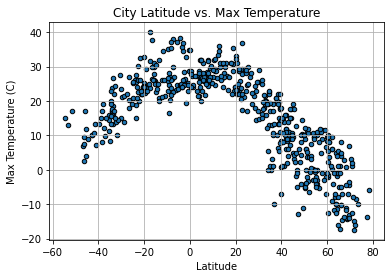

<Figure size 432x288 with 0 Axes>

In [65]:
data_df.plot(kind="scatter",x="Lat",y="Max Temp",linewidths=1,edgecolors="black")
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()
plt.show()
plt.savefig("../output_data/LatitudeVSTemp.png")

#### Latitude vs. Humidity Plot

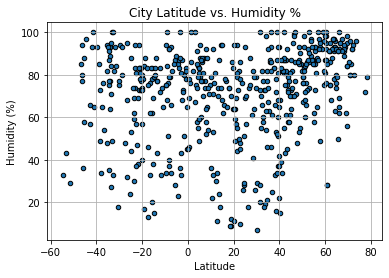

<Figure size 432x288 with 0 Axes>

In [66]:
data_df.plot(kind="scatter",x="Lat",y="Humidity",linewidths=1,edgecolors="black")
plt.title("City Latitude vs. Humidity %")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.show()
plt.savefig("../output_data/LatitudeVSHumidity.png")

#### Latitude vs. Cloudiness Plot

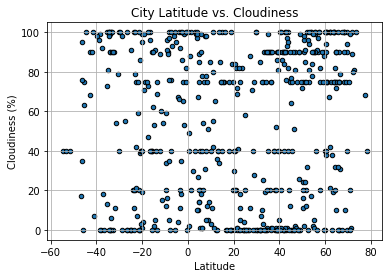

<Figure size 432x288 with 0 Axes>

In [67]:
data_df.plot(kind="scatter",x="Lat",y="Cloudiness",linewidths=1,edgecolors="black")
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.show()
plt.savefig("../output_data/LatitudeVSCloud.png")

#### Latitude vs. Wind Speed Plot

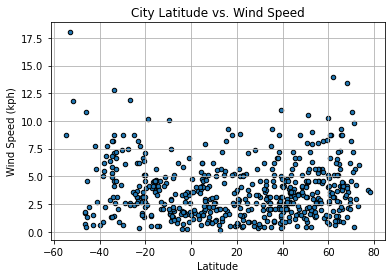

<Figure size 432x288 with 0 Axes>

In [68]:
data_df.plot(kind="scatter",x="Lat",y="Wind Speed",linewidths=1,edgecolors="black")
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (kph)")
plt.grid()
plt.show()
plt.savefig("../output_data/LatitudeVSWind.png")

## Linear Regression

In [72]:
# OPTIONAL: Create a function to create Linear Regression plots
def linear_regression(x,y,title,x_label,y_label):
    from scipy.stats import linregress
    (slope,intercept,rvalue,pvalue,stderr)=linregress(x,y)
    regress_values=x*slope+intercept
    line_eq=f"y = x * {str(round(slope,2))} + {str(round(intercept,2))}" 
    plt.scatter(x,y)
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,xycoords="axes points",xy=(10,10),fontsize=18,color="red")
    print(f"The r-squared is: {rvalue**2}")
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

In [33]:
# Create Northern and Southern Hemisphere DataFrames
north_hem=data_df[data_df["Lat"]>=0]

In [34]:
south_hem=data_df[data_df["Lat"]<=0]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.761511483329036


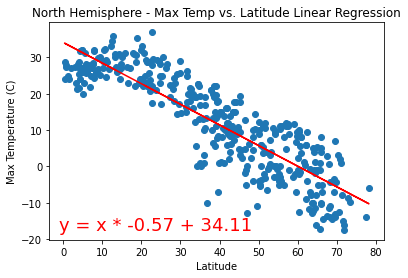

<Figure size 432x288 with 0 Axes>

In [73]:
linear_regression(north_hem["Lat"],north_hem["Max Temp"],"North Hemisphere - Max Temp vs. Latitude Linear Regression","Latitude","Max Temperature (C)")
plt.savefig("../output_data/North_LatitudeVSTemp.png")

## Analysis 
*There is a negative and strong relationship between the Max Temperature and the City Latitude, this confirms that at a Higher Latitude a LOWER temperature  

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5495168548860774


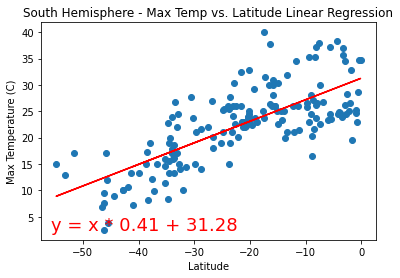

<Figure size 432x288 with 0 Axes>

In [80]:
linear_regression(south_hem["Lat"],south_hem["Max Temp"],"South Hemisphere - Max Temp vs. Latitude Linear Regression","Latitude","Max Temperature (C)")
plt.savefig("../output_data/South_LatitudeVSTemp.png")

## Analysis 
*There is a positive and weak relationship between the Max Temperature and the City Latitude in the South Hemisphere, this gives us an not conclusive idea that at a LOWER Latitude a LOWER temperature  

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10524735660643368


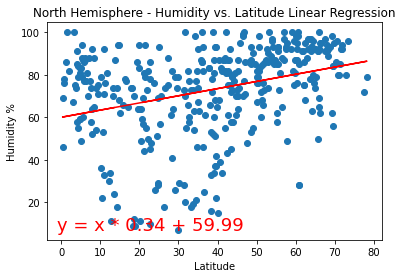

<Figure size 432x288 with 0 Axes>

In [77]:
linear_regression(north_hem["Lat"],north_hem["Humidity"],"North Hemisphere - Humidity vs. Latitude Linear Regression","Latitude","Humidity %")
plt.savefig("../output_data/North_LatitudeVSHumidity.png")

## Analysis 
*There is a very little relationship between the Humidity percentage and the latitude on the North Hemisphere. 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.000789164990770455


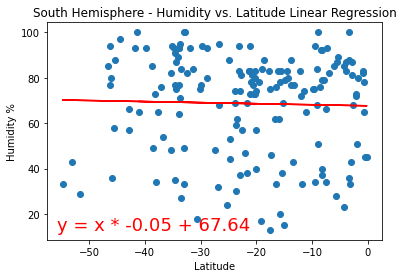

<Figure size 432x288 with 0 Axes>

In [82]:
linear_regression(south_hem["Lat"],south_hem["Humidity"],"South Hemisphere - Humidity vs. Latitude Linear Regression","Latitude","Humidity %")
plt.savefig("../output_data/South_LatitudeVSHumidity.png")

## Analysis 
*There is no relationship between the Humidity percentage and the Latitude on cities on the South Hemisphere 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.04329559947661469


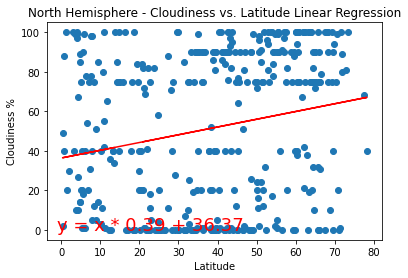

<Figure size 432x288 with 0 Axes>

In [78]:
linear_regression(north_hem["Lat"],north_hem["Cloudiness"],"North Hemisphere - Cloudiness vs. Latitude Linear Regression","Latitude","Cloudiness %")
plt.savefig("../output_data/North_LatitudeVSCloudiness.png")

## Analysis 
*There is no relationship between the Cloudiness percentage and the Latitude of the Cities on the North Hemisphere

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0023537125857620153


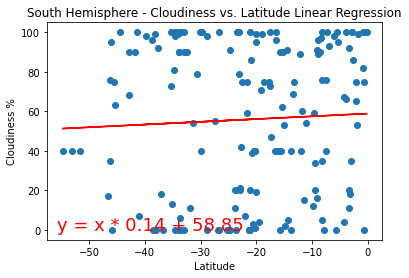

<Figure size 432x288 with 0 Axes>

In [83]:
linear_regression(south_hem["Lat"],south_hem["Cloudiness"],"South Hemisphere - Cloudiness vs. Latitude Linear Regression","Latitude","Cloudiness %")
plt.savefig("../output_data/South_LatitudeVSCloudiness.png")

## Analysis 
*There is no relationship between the Cloudiness percentage and the Latitude of the Cities on the South Hemisphere

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.043298461239189616


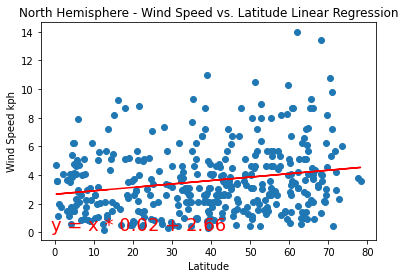

<Figure size 432x288 with 0 Axes>

In [79]:
linear_regression(north_hem["Lat"],north_hem["Wind Speed"],"North Hemisphere - Wind Speed vs. Latitude Linear Regression","Latitude","Wind Speed kph")
plt.savefig("../output_data/North_LatitudeVSWind.png")

## Analysis 
*There is no relationship between the Wind Speed and the Latitude of the Cities on the North Hemisphere

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.11825783759080309


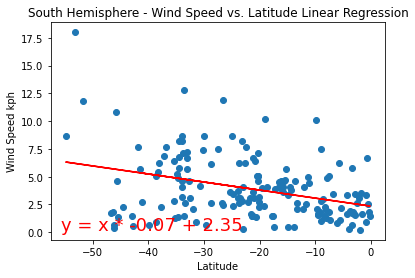

<Figure size 432x288 with 0 Axes>

In [84]:
linear_regression(south_hem["Lat"],south_hem["Wind Speed"],"South Hemisphere - Wind Speed vs. Latitude Linear Regression","Latitude","Wind Speed kph")
plt.savefig("../output_data/South_LatitudeVSWind.png")

## Analysis 
*There is a very weak relationship between the Wind Speed and the Latitude of the Cities on the South Hemisphere